In [857]:
import pandas as pd
from pandas import Series
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [858]:
data = pd.read_csv('ticdata2000.csv') 
#데이터로드

In [859]:
data.info()
#데이터정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
1     5822 non-null int64
2     5822 non-null int64
3     5822 non-null int64
4     5822 non-null int64
5     5822 non-null int64
6     5822 non-null int64
7     5822 non-null int64
8     5822 non-null int64
9     5822 non-null int64
10    5822 non-null int64
11    5822 non-null int64
12    5822 non-null int64
13    5822 non-null int64
14    5822 non-null int64
15    5822 non-null int64
16    5822 non-null int64
17    5822 non-null int64
18    5822 non-null int64
19    5822 non-null int64
20    5822 non-null int64
21    5822 non-null int64
22    5822 non-null int64
23    5822 non-null int64
24    5822 non-null int64
25    5822 non-null int64
26    5822 non-null int64
27    5822 non-null int64
28    5822 non-null int64
29    5822 non-null int64
30    5822 non-null int64
31    5822 non-null int64
32    5822 non-null int64
33    5822 non-null int64
34    5822 non-null int64
35    582

In [860]:
feature = ['1','4','5','6','65','86']
new_data = data[feature]
new_data.head()
#5개의 feature 임의로 뽑기 

,1,4,5,6,65,86
0,33,2,8,0,0,0
1,37,2,8,1,2,0
2,37,2,8,0,1,0
3,9,3,3,2,0,0
4,40,2,10,1,0,0


In [861]:
#EDA처리
#EDA수행

display(new_data.shape)
display(new_data.info())
display(new_data.describe())

(5822, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 6 columns):
1     5822 non-null int64
4     5822 non-null int64
5     5822 non-null int64
6     5822 non-null int64
65    5822 non-null int64
86    5822 non-null int64
dtypes: int64(6)
memory usage: 273.0 KB


None

,1,4,5,6,65,86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.305565,3.000687,5.798866,0.707832,0.395569,0.060117
std,12.957103,0.804770,2.886904,1.024022,0.490768,0.237724
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,30.000000,3.000000,7.000000,0.000000,0.000000,0.000000
75%,35.000000,3.000000,8.000000,1.000000,1.000000,0.000000
max,41.000000,6.000000,10.000000,9.000000,2.000000,1.000000


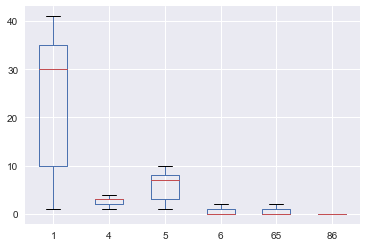

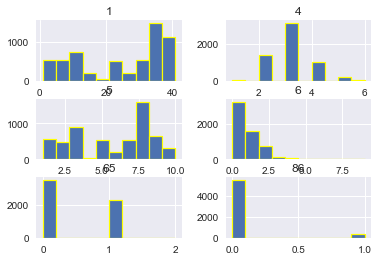

In [862]:
#시각화 하기

new_data.boxplot()
plt.show()
new_data.hist(edgecolor='yellow', linewidth=1.2)
plt.show()


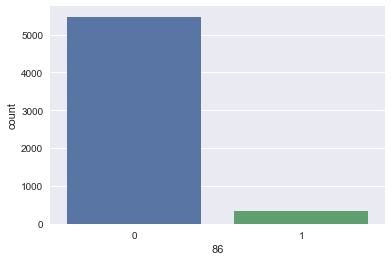

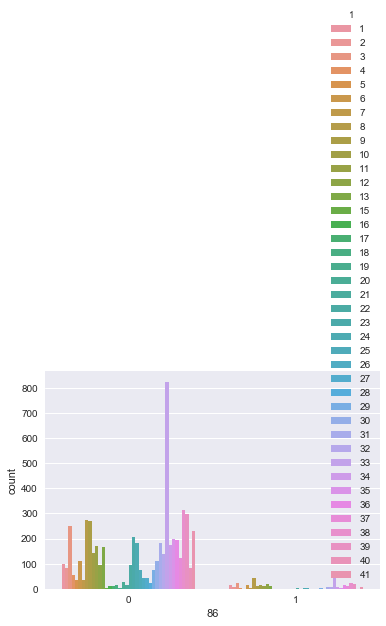

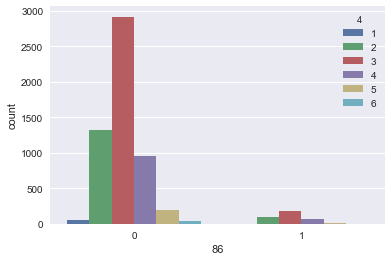

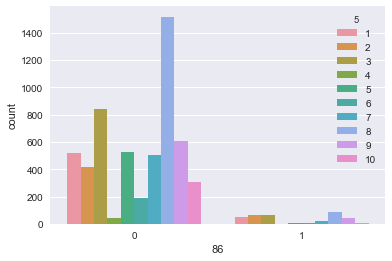

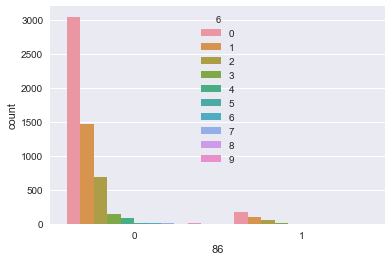

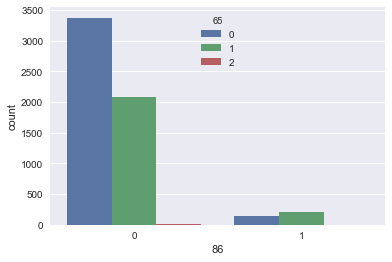

In [863]:
#Class에 따른 값들 시각화
sns.countplot(x="86", data=new_data)
plt.show()
#각 feature별 class의 개수 시각화
sns.countplot(x="86", hue="1", data=new_data)
plt.show()
sns.countplot(x="86", hue="4", data=new_data)
plt.show()
sns.countplot(x="86", hue="5", data=new_data)
plt.show()
sns.countplot(x="86", hue="6", data=new_data)
plt.show()
sns.countplot(x="86", hue="65", data=new_data)
plt.show()

In [864]:
# B.모든 feature에 대해 correlation coefficient array를 구하기
coef = data.corr()
display(coef)

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
1,1.000000,-0.050502,-0.002441,0.013308,0.992780,-0.218233,0.098530,-0.022286,-0.021002,-0.040365,...,0.022396,-0.007648,-0.014987,-0.007458,-0.022243,0.009166,-0.021245,-0.006044,-0.037020,-0.075681
2,-0.050502,1.000000,-0.008752,0.047134,-0.057990,0.009730,-0.042856,0.039343,0.016723,0.002742,...,-0.016936,0.004383,-0.010380,0.014874,-0.008637,-0.010039,-0.016164,0.046490,0.000202,-0.000310
3,-0.002441,-0.008752,1.000000,-0.343551,0.033054,0.011794,0.038592,-0.116939,0.005271,0.538040,...,-0.005664,0.026486,0.018801,-0.000612,-0.000506,-0.033116,0.031447,0.003956,0.037911,0.055814
4,0.013308,0.047134,-0.343551,1.000000,0.007750,-0.041657,0.101279,0.068449,-0.130320,-0.064162,...,0.013557,-0.004496,-0.003082,0.023901,-0.006680,0.014601,0.018550,-0.006887,-0.005536,0.003376
5,0.992780,-0.057990,0.033054,0.007750,1.000000,-0.221993,0.104175,-0.030376,-0.020856,-0.003125,...,0.020514,-0.004882,-0.015180,-0.009118,-0.020016,0.006558,-0.021810,-0.005402,-0.034087,-0.073495
6,-0.218233,0.009730,0.011794,-0.041657,-0.221993,1.000000,-0.365898,0.034814,-0.085572,-0.019991,...,-0.011446,-0.003348,-0.025469,-0.016298,0.003937,0.009912,-0.014538,0.021739,-0.011448,0.010062
7,0.098530,-0.042856,0.038592,0.101279,0.104175,-0.365898,1.000000,-0.326512,-0.741675,0.113657,...,0.004640,0.015818,0.044950,0.047148,0.010356,0.005059,0.012887,-0.010462,0.023554,0.027168
8,-0.022286,0.039343,-0.116939,0.068449,-0.030376,0.034814,-0.326512,1.000000,-0.128571,-0.136351,...,-0.000352,-0.004751,-0.000551,0.004498,0.003739,0.008808,0.005838,-0.008234,-0.001484,0.005587
9,-0.021002,0.016723,0.005271,-0.130320,-0.020856,-0.085572,-0.741675,-0.128571,1.000000,-0.067862,...,-0.007535,-0.008114,-0.034981,-0.044825,-0.018968,-0.014676,-0.006613,-0.001686,-0.024437,-0.037227
10,-0.040365,0.002742,0.538040,-0.064162,-0.003125,-0.019991,0.113657,-0.136351,-0.067862,1.000000,...,-0.012207,0.047875,0.002731,-0.008070,0.007968,-0.007276,0.029216,-0.001083,0.040635,0.078190


In [865]:
unsortcoef = pd.DataFrame(coef['86'])
unsortcoef
#86feature와 관련된 correlation array 구하기 

,86
1,-0.075681
2,-0.000310
3,0.055814
4,0.003376
5,-0.073495
6,0.010062
7,0.027168
8,0.005587
9,-0.037227
10,0.078190


In [866]:
sortcoef = unsortcoef.sort_values(by=['86'])
# correlation coefficient가 높은 5개의 feature 뽑기위해 소팅하기 

In [867]:
sortcoef

,86
18,-0.102905
37,-0.088732
34,-0.086394
30,-0.084089
35,-0.075699
1,-0.075681
5,-0.073495
12,-0.067768
13,-0.064311
24,-0.064065


In [1466]:
hcorrelation = ['47','68','59','43','44']
highcoef = pd.DataFrame(coef[hcorrelation])
highcoef
#관련이 높은 5개의 feature의 전체 featrue와의 coefiicient array 구하기 

,47,68,59,43,44
1,-0.006039,-0.002510,0.000191,-0.572410,-0.038443
10,0.027090,0.031661,0.050482,0.315639,-0.031926
11,-0.007582,-0.008124,-0.025973,-0.059341,0.020370
12,-0.026266,-0.032038,-0.042780,-0.329837,0.021889
13,-0.032323,-0.034808,-0.052708,-0.294823,0.032771
14,-0.005813,-0.006642,0.017289,-0.025288,-0.012570
15,0.029853,0.031223,0.030087,0.256742,-0.024390
16,0.000071,-0.000590,0.026918,0.409781,0.041827
17,0.003023,0.001778,0.002338,0.231268,0.030296
18,-0.002012,-0.000530,-0.021589,-0.456782,-0.050705


In [1467]:
coefcoef = highcoef.corr()
coefcoef
#correlation coefficient가 높은 5개의  서로의 coeeficicent 구하기 

,47,68,59,43,44
47,1.000000,0.993500,0.206477,0.076444,0.267868
68,0.993500,1.000000,0.210336,0.085330,0.247550
59,0.206477,0.210336,1.000000,0.192795,0.697655
43,0.076444,0.085330,0.192795,1.000000,0.054736
44,0.267868,0.247550,0.697655,0.054736,1.000000


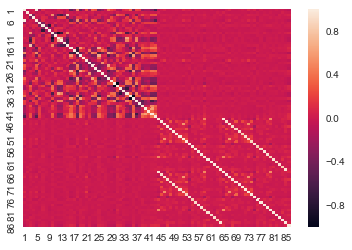

In [870]:
#모든 feature에 대해 heatmap 그리기 

sns.heatmap(coef)
plt.show()

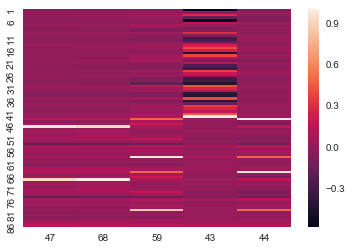

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [871]:
#5개 feature와  다른 모든 featrue에대해 heatmap 그리기 
sns.heatmap(highcoef)
plt.show(highcoef)

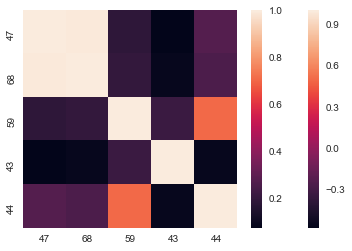

In [872]:
sns.heatmap(coefcoef)
plt.show()
#5개 feature끼리의 heatmap구하기 

In [1525]:
#regression 모델 학습 후 training accuracy를 출력한다
#featrue 정하기 
pick_feature = ['47','68','59','43','44']
regression_data = data[pick_feature]
regression_result = data['86']

In [1621]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(regression_data, regression_result, test_size=0.2)
#validation data를 사용하여 regression 모델을 최적화

In [1622]:
lgr = LogisticRegression().fit(regression_data, regression_result)

In [1623]:
lgr.score(regression_data, regression_result)
# 테스트 트레인으로학습하기전의 데이터들의 정확성 구하기

0.9398832016489179

In [1624]:
lgr2 = LogisticRegression().fit(X_train, Y_train)

In [1625]:
lgr2.score(X_train, Y_train)
#테스트 트레인으로 나누어서 학습한후 정확성 구하기 

0.9407343783551643

In [1626]:
lgr2.score(X_test, Y_test)

0.936480686695279

In [1627]:
#테스트데이터 가져오기
test_data = pd.read_csv('ticeval2000.csv') 
test_data.head()


,1,2,3,4,5,6,7,8,9,10,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,4,0,5,9,...,0,0,0,0,0,0,0,0,0,0
1,1,1,3,4,1,0,6,2,2,9,...,0,0,0,0,0,0,0,0,0,0
2,33,1,4,2,8,0,8,1,0,9,...,0,0,0,0,1,0,0,0,0,0
3,11,2,2,5,3,2,4,4,0,5,...,0,0,0,0,1,0,0,0,0,0
4,37,1,3,3,8,2,6,1,2,7,...,0,0,0,0,0,0,0,0,0,0


In [1392]:
test_pick = test_data[pick_feature]
test_pick.head()

,47,68,59,43,44
0,5,1,0,3,0
1,0,0,0,8,0
2,0,0,3,3,2
3,5,1,4,6,2
4,6,2,0,4,0


In [1393]:
#테스트데이터 넣어서 결과값 예측
test_result = lgr2.predict(test_pick)
test_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1394]:
#확률 더 높이기 
#1, 정규화해보기 
# train과 test데이터 합쳐서 정규화하기 
total_data = pd.concat([data,test_data], axis=0)
total_data.info()
data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9822 entries, 0 to 3999
Data columns (total 86 columns):
1     9822 non-null int64
10    9822 non-null int64
11    9822 non-null int64
12    9822 non-null int64
13    9822 non-null int64
14    9822 non-null int64
15    9822 non-null int64
16    9822 non-null int64
17    9822 non-null int64
18    9822 non-null int64
19    9822 non-null int64
2     9822 non-null int64
20    9822 non-null int64
21    9822 non-null int64
22    9822 non-null int64
23    9822 non-null int64
24    9822 non-null int64
25    9822 non-null int64
26    9822 non-null int64
27    9822 non-null int64
28    9822 non-null int64
29    9822 non-null int64
3     9822 non-null int64
30    9822 non-null int64
31    9822 non-null int64
32    9822 non-null int64
33    9822 non-null int64
34    9822 non-null int64
35    9822 non-null int64
36    9822 non-null int64
37    9822 non-null int64
38    9822 non-null int64
39    9822 non-null int64
4     9822 non-null int64
40    982

In [1533]:
#선택한 feature 뽑은 데이터 만들어서 정규화하기 
pick_feature2 = ['47','68','59','43','4']
unnormal_total_data = total_data[pick_feature2]
unnormal_total_data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(unnormal_total_data)
np_norm_total_data = scaler.transform(unnormal_total_data)
norm_total_data = pd.DataFrame(np_norm_total_data)
norm_total_data.describe()


,0,1,2,3,4
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000
mean,0.328492,0.046435,0.231177,0.465762,0.399287
std,0.324637,0.050715,0.235159,0.285559,0.160932
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.285714,0.200000
50%,0.555556,0.083333,0.250000,0.428571,0.400000
75%,0.666667,0.083333,0.500000,0.714286,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [1534]:
#원래대로 train과 test데이터로 나누기 
norm_train = norm_total_data.loc[:5821,:]
norm_test = norm_total_data.loc[5822:,:]
norm_train.info()
norm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
0    5822 non-null float64
1    5822 non-null float64
2    5822 non-null float64
3    5822 non-null float64
4    5822 non-null float64
dtypes: float64(5)
memory usage: 227.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 5822 to 9821
Data columns (total 5 columns):
0    4000 non-null float64
1    4000 non-null float64
2    4000 non-null float64
3    4000 non-null float64
4    4000 non-null float64
dtypes: float64(5)
memory usage: 156.3 KB


In [1726]:
#전체 정규화 한 데이터로 학습하기 
X_train, X_test, Y_train, Y_test = train_test_split(norm_train, regression_result, test_size=0.2)

lgr3 = LogisticRegression().fit(X_train, Y_train)
lgr3.score(X_train, Y_train)
#테스트 트레인으로 나누어서 학습한후 정확성 구하기 

0.9422374919476058

In [1727]:
lgr3.score(X_test, Y_test)

0.9304721030042918

In [1728]:
#테스트데이터넣어서 결과값 확인
norm_test_result = lgr3.predict(norm_test)
norm_test_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1739]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#라소 사용해보기 
X_train, X_test, Y_train, Y_test = train_test_split(norm_train, regression_result, test_size=0.2)


In [1730]:
c_list = [0.1, 0.5, 1, 5, 10, 50, 100]
lasso_err = []

In [1731]:
for i in c_list:
    lgr4 = LogisticRegression(C=i,penalty='l1')
    lgr4.fit(X_train,Y_train)
    scores = cross_val_score(lgr4, X_train, Y_train, cv=10)
    lasso_err.append(1-scores.mean())

In [1732]:
c_optimal = c_list[lasso_err.index(min(lasso_err))]
c_optimal

0.1

In [1740]:
lgr4_opt = LogisticRegression(C=c_optimal,penalty='l1')
lgr4_opt.fit(X_train,Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1741]:
lgr4_opt.score(X_train, Y_train)

0.9426669529740176

In [1742]:
lgr4_opt.score(X_test, Y_test)

0.9287553648068669

In [1744]:
#Ridge 로해보기
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(norm_train, regression_result, test_size=0.2)


In [1611]:
c_list = [0.1, 0.5, 1, 5, 10, 50, 100]
ridge_err = []

In [1612]:
for i in c_list:
    lgr5 = LogisticRegression(C=i,penalty='l2')
    lgr5.fit(X_train,Y_train)
    scores = cross_val_score(lgr5, X_train, Y_train, cv=10)
    ridge_err.append(1-scores.mean())

In [1613]:
c_optimal_ridge = c_list[ridge_err.index(min(ridge_err))]
c_optimal_ridge

0.1

In [1745]:
lgr5_opt = LogisticRegression(C=c_optimal_ridge,penalty='l2')
lgr5_opt.fit(X_train,Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1746]:
lgr5.score(X_train, Y_train)

0.9407343783551643

In [1747]:
lgr5.score(X_test, Y_test)

0.936480686695279

In [1748]:
#가장 확률이 높은 전체 정규화해서 lasso사용한 데이터를 이용하기로 결정 
final = lgr4.predict(norm_test)

In [1749]:
final2 = pd.DataFrame(final)

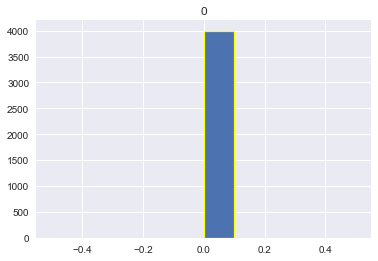

In [1750]:
final2.hist(edgecolor='yellow', linewidth=1.2)
plt.show()

In [1751]:
with open("homework2_result.csv", "w") as f:
    for i in range(len(final)):
        f.write((str)(final[i])+'\n')